The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
MJD: 58372.9628576 SHK: 0.02196822973946268
MJD: 58394.9053518 SHK: 0.02237763531745034
MJD: 58471.952604 SHK: 0.02169636215113553
MJD: 58497.8457527 SHK: 0.02327171380161823
MJD: 58538.7946656 SHK: 0.02108226659807099
MJD: 58655.1802291 SHK: 0.018660287261853415
MJD: 58678.3833778 SHK: 0.019371944492607023
MJD: 58705.2963987 SHK: 0.018973755132916298
MJD: 58731.9782797 SHK: 0.01958328999107454
MJD: 58761.9852142 SHK: 0.020090123622303828
MJD: 58791.8171273 SHK: 0.01907733239828594
MJD: 58821.7624131 SHK: 0.020730355326272945
MJD: 58850.8438687 SHK: 0.020191463894221058
MJD: 58884.8156864 SHK: 0.020713848636398694
MJD: 59030.1570547 SHK: 0.02161026377232745
MJD: 59054.0852199 SHK: 0.021526183678740922
MJD: 59068.1538922 SHK: 0.02332479957206384
MJD: 59094.9768777 SHK: 0.021877158824095758
MJD: 59195.7275335 SHK: 0.0188046477950501
MJD: 59219.7235948 SHK: 0.023587392368865853
MJD: 59241.8083241 SHK: 

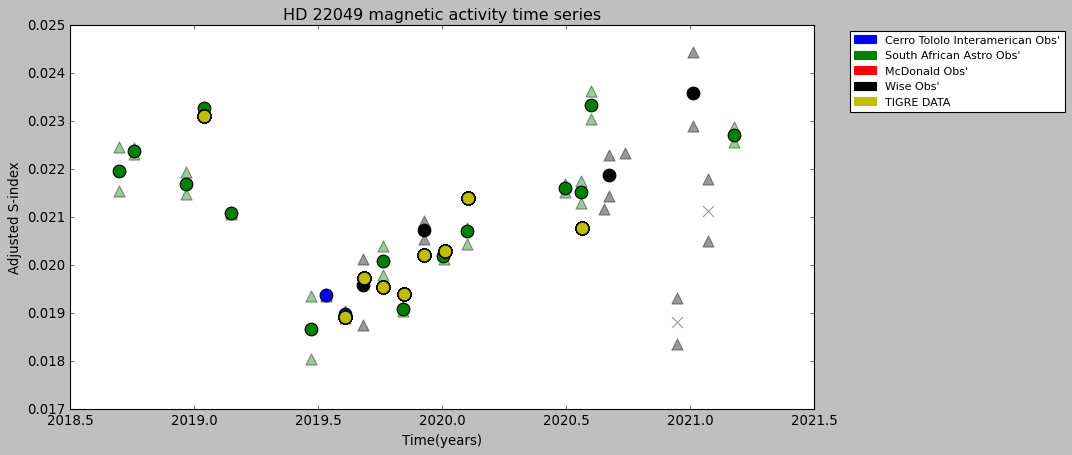

In [20]:
#This is a the general outline for creating plots with data from outside the pipeline.
#Run the star in our pipeline, set the folders right, then put the other data into our data
#structures and call our plot function

%load_ext autoreload
%autoreload

import pandas as pd

from astropy.time import Time
import pickle as pickle

import helpers as h
import numpy as np
import plotting as plotter
from matplotlib import pyplot as plt
import pipeline_testing as p
#Project folder directory on your computer
homePath = 'D:/My Documents/Coding Projects/nreshk/'

tigre_time = [58821.600372,58761.782399,58705.976047,58498.615642,58792.747160,58852.603066,59055.971305,58733.927439,58887.557436]
tigre_amp=[0.0202140000000,0.0195450000000,0.0189260000000, 0.0231120000000,0.0193870000000,0.0202940000000,0.0207720000000,0.0197320000000,0.0214040000000]

#required paths for pipeline, try not to change ever
dataPath = homePath + 'data/'
outputPath = homePath + 'output/'
starName = '22049'
starPath = outputPath + starName + '/'
site = 'SMARTS'

#load the data which has already been output by pipeline
with open(starPath+starName+'.pkl','rb') as f:
    analyzedData = pickle.load(f)
nres_time=[]
nres_shk=[]
for d in analyzedData:
    
    nres_time.append(d.mjd)
    nres_shk.append(d.shk)

#column names in the csv to be used
cols=['year','adjShk']

h.siteColors.update({site:['m','SMARTS DATA']})#update the site colors with the proper site name
h.siteColors.update({site:['y','TIGRE DATA']})#update the site colors with the proper site name


#load the data which has already been output by pipeline
with open(starPath+starName+'.pkl','rb') as f:
    analyzedData = pickle.load(f)

#'lsc':["b","Cerro Tololo Interamerican Obs\'"],
#'cpt':["g","South African Astro Obs\'"],
#'elp':["r","McDonald Obs\'"],
#'tlv':["k","Wise Obs\'"]}
#want to adjust alpha's do it here
tigreAlphas ={     'lsc':.435,#The alpha value in the Ca HK SHK calculation is telescope dependent
                'cpt':.47,
                'elp':.5,
                'tlv':.53}


smartsAlphas ={     'lsc':9.2,#The alpha value in the Ca HK SHK calculation is telescope dependent
                'cpt':9.7,
                'elp':15,
                'tlv':11}

#plt.figure()
#plt.scatter(tigre_time,tigre_amp)#*cur[cur!=0],'k-')
#plt.scatter(nres_time,nres_shk)#*cur[cur!=0],'k-')

#plt.show()
#plt.close()


p.adjust_sites(analyzedData,alphas=tigreAlphas)

#read in smarts data
csv_data = pd.read_csv(homePath+site+'/'+starName+'.csv',usecols=cols,dtype={cols[0]:np.float64,cols[1]:np.float64})
csv_data.apply(pd.to_numeric, errors='coerce')


#make a 'fake' data structure to easily print with
for i in range(len(csv_data-1)):
    year = csv_data['year'][i]
    shk = csv_data[cols[1]][i]

    tmp = h.analyzedData(shk=shk)

    tmp.decimalYr=Time(year,format='decimalyear')
    tmp.site = site
    tmp.average = True
    analyzedData.append(tmp)


for i in range(len(csv_data-1)):
    year = tigre_time
    shk = tigre_amp

    tmp = h.analyzedData(shk=shk)
    t=Time(year,format='mjd')
    t.format = 'decimalyear'
    tmp.decimalYr=t

    tmp.site = site
    tmp.average = True
    analyzedData.append(tmp)


#create the overlay cycle and pass the plot to the pipeline plot function
fig, ax = plt.subplots(figsize=(12,6))
plt.xlim([2018.5,2021.5])
plt.ylim([0.017,.025])
time = np.arange(2018.5,2021,.1)
amp = .12*np.sin(2*np.pi/2.9*time+.2)+.55
#plt.plot(tigre_time,tigre_amp)
#plt.plot(time,amp)
plotter.plot_timeseries(analyzedData,[59195.7275335,59241.8083241],fig,ax,outputPath=)
